In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

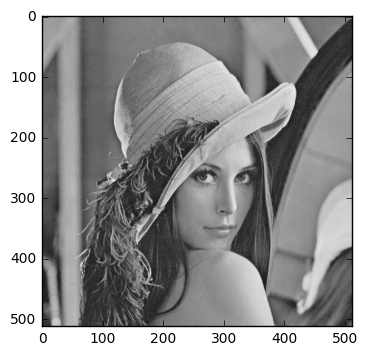

In [2]:
img = Image.open('lena.bmp')
original_lena_plt = plt.imshow(np.asarray(img), cmap='gray', vmin=0, vmax=255)

In [3]:
def histogram(img):
    h = [0]*256
    height, width = img.size
    img = np.asarray(img)
    for i in range(width):
        for j in range(height):
            h[img[i][j]] += 1
    
    return h

def show_histogram(h):
    h_ = []
    for i in range(len(h)):
        if h[i] == 0:
            continue
        else:
            temp_h = [i] * int(h[i])
            h_ = h_ + temp_h
    bins = range(0, 256)
    plt.hist(h_, bins=bins, alpha=0.8, histtype='bar', color='blue', ec='blue')

def histogram_equalization(img):
    hist = histogram(img)
    height, width = img.size
    img = np.asarray(img)
    new_img = np.empty(shape=(height, width), dtype=int)
    n = height * width
    pdf = []
    cdf = []
    s = 0
    for i in range(len(hist)):
        s += (hist[i] / n) * 255
        pdf.append(hist[i] / n)
        cdf.append(s)
    for i in range(width):
        for j in range(height):
            new_img[i][j] = cdf[img[i][j]]
            
    return new_img.astype('uint8')

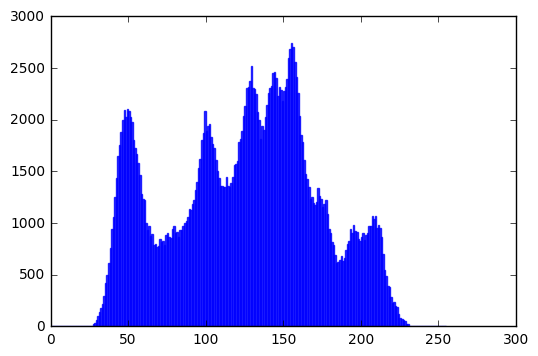

In [4]:
new_img = histogram_equalization(img)
h = histogram(img)
he = histogram(Image.fromarray(new_img, 'L'))
show_histogram(h)

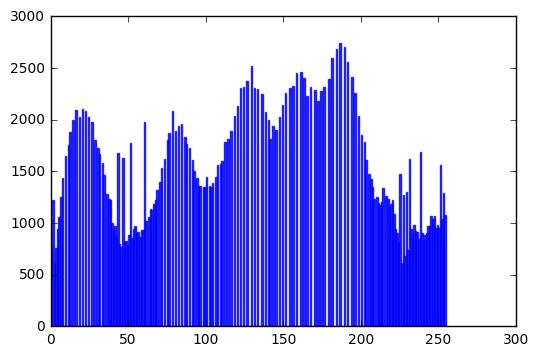

In [5]:
show_histogram(he)

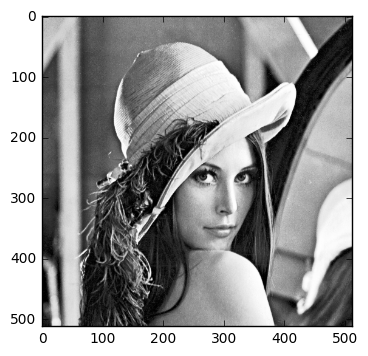

In [6]:
new_img = Image.fromarray(new_img, 'L')
plt = plt.imshow(np.asarray(new_img), cmap='gray', vmin=0, vmax=255)